### How would the annual performance reports of honey bees compare to the annual reports released by Bumble? What are the relative strengths and weaknesses of each entity and what opportunities and risks should potential stakeholders be aware of? 
#### Key Metrics (annually and 3 year average)
-Revenue
-Gross Profit Margin (revenue - COGS)
#### Other Questions
-Which entity appears more stable over the measured period?
-How does each entity diversify revenue streams? What percentage of total revenue does each revenue stream make up?
-What are the highest costs?
-How would queen bees be compensated if they were paid on similar scale to bumble CEOs (ceo comp data is in bumble proxy report)

In [2]:
#Library setup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import locale
locale.setlocale(locale.LC_NUMERIC, 'en_US.UTF-8')


'en_US.UTF-8'

### Bumble Inc Metrics

In [4]:
#Read in and clean annual report
bb_op_costs23 = pd.read_csv('../data/23operating_costs.csv')
bb_op_costs = bb_op_costs23.rename(columns = {'in_thousands': 'metric_in_thousands', 'ye_2023': '2023', 'ye_2022': '2022', 'ye_2021': '2021'})
bb_op_costs = bb_op_costs.set_index('metric_in_thousands').transpose()
bb_op_costs = bb_op_costs.reset_index()
bb_op_costs = bb_op_costs.reset_index(drop = True).rename(columns={'index': 'Year'})
bb_op_costs['Year'] = bb_op_costs['Year'].astype(int)


##### Revenue

In [6]:
#Format revenue values with locale to remove commas and cast as float
bb_op_costs['Revenue'] = bb_op_costs['Revenue'].astype(str)
rev_list = []
for value in bb_op_costs['Revenue']:
    rev_list.append(locale.atof(value))
bb_op_costs['Revenue'] = rev_list

In [7]:
#Revenue: 3yr Average and Year-over-Year
rev_3yr_avg = bb_op_costs['Revenue'].mean()
rev_yoy = bb_op_costs[['Year','Revenue']]


##### Gross Margin

In [9]:
#Format total operating costs and expenses with locale to remove commas and cast as float
bb_op_costs['Totaloperatingcostsandexpenses'] = bb_op_costs['Totaloperatingcostsandexpenses'].astype(str)
topce_list = []
for value in bb_op_costs['Totaloperatingcostsandexpenses']:
    topce_list.append(locale.atof(value))
bb_op_costs['Totaloperatingcostsandexpenses'] = topce_list

In [10]:
#Format depreciation and amortization expenses with locale to remove commas and cast as float
bb_op_costs['Depreciationandamortizationexpense'] = bb_op_costs['Depreciationandamortizationexpense'].astype(str)
daa_list = []
for value in bb_op_costs['Depreciationandamortizationexpense']:
    daa_list.append(locale.atof(value))
bb_op_costs['Depreciationandamortizationexpense'] = daa_list

In [11]:
#Ebitda: 3yr Average and Year-over-Year
bb_op_costs['Ebitda_Earnings'] = bb_op_costs['Revenue'] - bb_op_costs['Totaloperatingcostsandexpenses'] + bb_op_costs['Depreciationandamortizationexpense']
ebitda_3yr_avg = bb_op_costs['Ebitda_Earnings'].mean()
ebitda_yoy = bb_op_costs[['Year','Ebitda_Earnings']]

#Ebitda Margin: 3yr Average and Year-over-Year
bb_op_costs['Ebitda_Margin'] = ((bb_op_costs['Ebitda_Earnings']/bb_op_costs['Revenue'])*100).round(0)
ebitda_margin_3yr_avg = (((bb_op_costs['Ebitda_Earnings'].sum())/(bb_op_costs['Revenue'].sum()))*100).round(0) #is this the best way to calculate this?
ebitda_margin_yoy = bb_op_costs[['Year','Ebitda_Margin']]
bb_op_costs


metric_in_thousands,Year,Revenue,Costofrevenue,Sellingandmarketingexpense,Generalandadministrativeexpense,Productdevelopmentexpense,Depreciationandamortizationexpense,Totaloperatingcostsandexpenses,Operatingearnings(loss),"Interestincome(expense),net","Otherincome(expense),net",Income(loss)beforeincometax,Incometaxbenefit(provision),Netearnings(loss),Netearnings(loss)attributabletononcontrollinginterests,Netearnings(loss)attributabletoBumbleInc.shareholders,Ebitda_Earnings,Ebitda_Margin
0,2023,1051830.0,307835,270380,221649,130565,68028.0,998457.0,53373,-21534,-26537,5302,-7170,-1868,2345,-4213,121401.0,12.0
1,2022,903503.0,"249,490","249,269","308,855","109,020",89713.0,1006347.0,-102844,"-24,063",16189,-110718,-3406,-114124,-34378,-79746,-13131.0,-1.0
2,2021,760910.0,"205,573","211,711","257,489","113,764",107056.0,895593.0,"(134,683","-24,574","3,160",-156097,"437,837","281,740",-28075,"309,815",-27627.0,-4.0


In [12]:
#Sandbox - adjusting business expensese to more fairly align with bee expenses
bb_op_costs['Generalandadministrativeexpense'] = bb_op_costs['Generalandadministrativeexpense'].astype(str)
gae_list = []
for value in bb_op_costs['Generalandadministrativeexpense']:
    gae_list.append(locale.atof(value))
bb_op_costs['Generalandadministrativeexpense'] = gae_list

bb_op_costs['Productdevelopmentexpense'] = bb_op_costs['Productdevelopmentexpense'].astype(str)
pde_list = []
for value in bb_op_costs['Productdevelopmentexpense']:
    pde_list.append(locale.atof(value))
bb_op_costs['Productdevelopmentexpense'] = pde_list


bb_op_costs['gross_profit_margin'] = ((bb_op_costs['Revenue'] - bb_op_costs['Productdevelopmentexpense'] - bb_op_costs['Generalandadministrativeexpense'])/(bb_op_costs['Revenue']))*100
bumble_profit_yoy = bb_op_costs[['Year','gross_profit_margin']]

### Honey Bee Metrics

In [14]:
#Read in and consolidate USDA honey info
honey23 = pd.read_csv('../data/23Nasshoney.csv')
honey22 = pd.read_csv('../data/22Nasshoney.csv')
honey21 = pd.read_csv('../data/21Nasshoney.csv')
honey20 = pd.read_csv('../data/20Nasshoney.csv')

honey = pd.concat([honey20,honey21, honey22, honey23])

inc_exp2223 = pd.read_csv('../data/2223Nass_inc_and_exp.csv')
inc_exp2021 = pd.read_csv('../data/2021inc_exp.csv')

inc_exp2021['Item'] = inc_exp2021['Item'].str.replace(' 1','').str.replace(' 2','').str.replace(' 3','').str.strip()
inc_exp2021.loc[2,'Item'] = 'Varroa control and treatment'
inc_exp2223['Item'] = inc_exp2223['Item'].str.strip()

inc_exp = pd.merge(inc_exp2021,inc_exp2223, how = 'outer', left_on = 'Item', right_on = 'Item')

##### Revenue

In [16]:
#Honey Sales Revenue

In [17]:
# Calculate annual honey sales by determing YoY depletion of stockpiles
honey['year_prior'] = honey['year'] - 1
honey_sales = pd.merge(honey, honey, left_on = ['state','year_prior'], right_on = ['state','year'])
honey_sales = honey_sales[['state', 'production_1000_pounds_x','stock_1000_pounds_x','price_per_pounds_dollars_x', 'year_x', 'year_prior_x', 'stock_1000_pounds_y']]
honey_sales = honey_sales.rename(columns = { 'production_1000_pounds_x': 'production_1000lbs_cy','stock_1000_pounds_x':'stock_1000lbs_cy','price_per_pounds_dollars_x':'price_per_lbs_cy', 'year_x':'current_year', 'year_prior_x':'year_prior', 'stock_1000_pounds_y':'stock_1000lbs_yp'})

In [18]:
#Format production numbers using locale
honey_sales['production_1000lbs_cy'] = honey_sales['production_1000lbs_cy'].astype(str)
pcy_list = []
for value in honey_sales['production_1000lbs_cy']:
    pcy_list.append(locale.atof(value))
honey_sales['production_1000lbs_cy'] = pcy_list

In [19]:
#Format stock numbers (current year) using locale
honey_sales['stock_1000lbs_cy'] = honey_sales['stock_1000lbs_cy'].astype(str)
scy_list = []
for value in honey_sales['stock_1000lbs_cy']:
    scy_list.append(locale.atof(value))
honey_sales['stock_1000lbs_cy'] = scy_list

In [20]:
#Format stock numbers (prior year) using locale
honey_sales['stock_1000lbs_yp'] = honey_sales['stock_1000lbs_yp'].astype(str)
spy_list = []
for value in honey_sales['stock_1000lbs_yp']:
    spy_list.append(locale.atof(value))
honey_sales['stock_1000lbs_yp'] = spy_list

In [21]:
#Calculate annual sales (in 1000 pounds and in 1000 dollars)
honey_sales['sales_1000lbs'] = (honey_sales['stock_1000lbs_yp'] + honey_sales['production_1000lbs_cy'] - honey_sales['stock_1000lbs_cy'])
honey_sales['sales_1000dollars'] = honey_sales['sales_1000lbs'] * honey_sales['price_per_lbs_cy']

In [22]:
#Honey sales revenue: 3yr Average and YoY
honey_rev_3_yr_avg = honey_sales.loc[honey_sales['state'] == 'United States 6 7']['sales_1000dollars'].mean()
honey_rev_yoy = honey_sales.loc[honey_sales['state'] == 'United States 6 7'][['current_year','sales_1000dollars']]

In [23]:
#Other Revenue plus expenses

In [24]:
#format income and expendiyure numbers using locale
inc_exp['2021_1000dollars'] = inc_exp['2021_1000dollars'].astype(str)
ie21_list = []
for value in inc_exp['2021_1000dollars']:
    ie21_list.append(locale.atof(value))
inc_exp['2021_1000dollars'] = ie21_list

inc_exp['2022_1000dollars'] = inc_exp['2022_1000dollars'].astype(str)
ie22_list = []
for value in inc_exp['2022_1000dollars']:
    ie22_list.append(locale.atof(value))
inc_exp['2022_1000dollars'] = ie22_list

inc_exp['2023_1000dollars'] = inc_exp['2023_1000dollars'].astype(str)
ie23_list = []
for value in inc_exp['2023_1000dollars']:
    ie23_list.append(locale.atof(value))
inc_exp['2023_1000dollars'] = ie23_list

In [25]:
#rearrange income and expenditure table so it can be joined with revenue table
inc_exp_grped = inc_exp[['inc_exp_x', '2021_1000dollars','2022_1000dollars', '2023_1000dollars']]
inc_exp_grped = inc_exp_grped.groupby('inc_exp_x').sum().transpose().reset_index().rename(columns = {'index': 'year', 'Expenditure': 'exp_1000dollars', 'Income': 'other_income_1000dollars'})
inc_exp_grped['year'] = inc_exp_grped['year'].str[0:4].astype(int)

In [26]:
#merge revenue table with income and expenditure table
all_rev_exp = pd.merge(honey_rev_yoy, inc_exp_grped, left_on = 'current_year', right_on = 'year')
all_rev_exp = all_rev_exp[['year', 'sales_1000dollars', 'other_income_1000dollars','exp_1000dollars']]

In [27]:
# Total Revenue
all_rev_exp ['total_revenue'] = all_rev_exp['sales_1000dollars'] + all_rev_exp['other_income_1000dollars']
bee_total_rev_3yr = all_rev_exp['total_revenue'].mean()
bee_total_rev_yoy = all_rev_exp[['year','total_revenue']]

##### Gross Profit Margin


In [29]:
#Gross Profit
all_rev_exp['gross_profit'] = all_rev_exp['sales_1000dollars'] + all_rev_exp['other_income_1000dollars'] - all_rev_exp['exp_1000dollars']

In [60]:
#Gross Profit Margin
all_rev_exp['profit_margin'] = (all_rev_exp['gross_profit']/all_rev_exp['total_revenue'])*100
bee_profit_3yr_avg = (all_rev_exp['gross_profit'].sum())/(all_rev_exp['total_revenue'].sum())
bee_profit_yoy = all_rev_exp[['year','profit_margin']]

### Comparison Analysis

C:\Users\aubre\AppData\Local\Temp\ipykernel_8120\1702925984.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bee_total_rev_yoy_concat['Entity'] = 'Bees'


Text(42.865201822916674, 0.5, 'Revenue (thousands)')

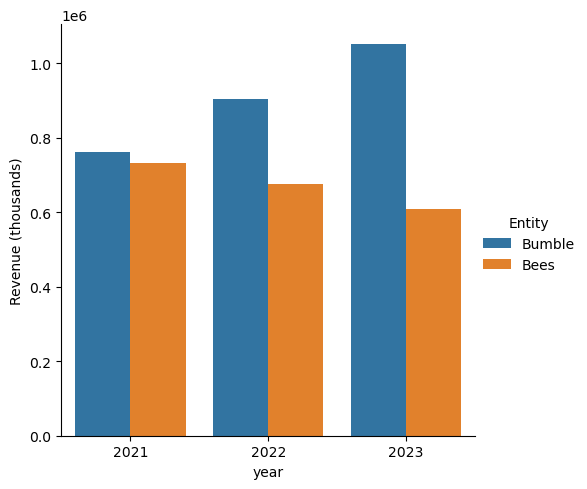

In [149]:
#### YoY Revenue
rev_yoy_concat = rev_yoy.rename(columns = {'Year':'year','Revenue':'total_revenue'})
rev_yoy_concat['Entity'] = 'Bumble'
bee_total_rev_yoy_concat = bee_total_rev_yoy
bee_total_rev_yoy_concat['Entity'] = 'Bees'
rev_catplot = pd.concat([rev_yoy_concat, bee_total_rev_yoy])

sns.catplot(kind = 'bar',data = rev_catplot, x = 'year', y = 'total_revenue', hue = 'Entity')
plt.ylabel('Revenue (thousands)')

In [97]:
#### YoY Profit Margin

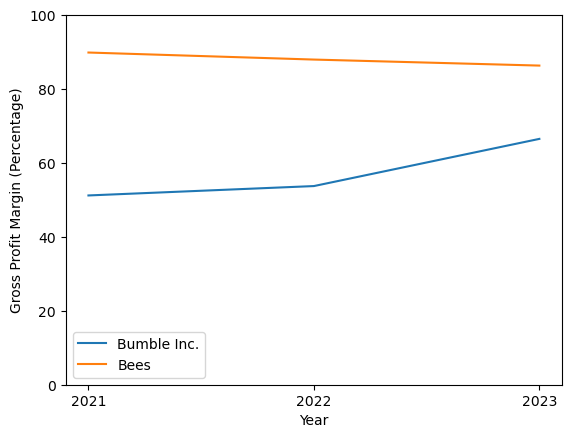

In [131]:
profit_comparison = pd.merge(bee_profit_yoy, bumble_profit_yoy, left_on = 'year', right_on = 'Year')
profit_comparison
sns.lineplot(data=bumble_profit_yoy, x='Year', y='gross_profit_margin', label='Bumble Inc.')
sns.lineplot(data=bee_profit_yoy, x='year', y='profit_margin', label='Bees')
plt.xticks(bee_profit_yoy['year'])
plt.xlabel('Year')
plt.ylabel('Gross Profit Margin (Percentage)')
plt.ylim(0, 100);

In [ ]:
### Gross Profit